## Transfer Learning Inception V3 using Keras

In [105]:
pip install tensorflow-gpu

In [106]:
!nvidia-smi

Tue Sep 22 13:30:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |   8187MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [107]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [108]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Please download the dataset from the below url

In [109]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [110]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Datasets/train'
valid_path = '/content/drive/My Drive/Datasets/test'


In [111]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [112]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [113]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/train/*')

In [114]:
folders

['/content/drive/My Drive/Datasets/train/diseased cotton plant',
 '/content/drive/My Drive/Datasets/train/fresh cotton plant',
 '/content/drive/My Drive/Datasets/train/diseased cotton leaf',
 '/content/drive/My Drive/Datasets/train/fresh cotton leaf']

In [115]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [116]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [117]:

# view the structure of the model
model.summary()


Model: "functional_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_658 (Conv2D)             (None, 111, 111, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_658 (BatchN (None, 111, 111, 32) 96          conv2d_658[0][0]                 
__________________________________________________________________________________________________
activation_658 (Activation)     (None, 111, 111, 32) 0           batch_normalization_658[0][0]    
______________________________________________________________________________________

In [118]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [119]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [120]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [121]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [122]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=61,
  validation_steps=2
)

Epoch 1/20
61/61 [==============================] - 41s 666ms/step - loss: 2.3556 - accuracy: 0.7406 - val_loss: 0.6747 - val_accuracy: 0.7778
Epoch 2/20
61/61 [==============================] - 33s 537ms/step - loss: 0.7011 - accuracy: 0.8929
Epoch 3/20
61/61 [==============================] - 32s 532ms/step - loss: 0.5576 - accuracy: 0.9134
Epoch 4/20
61/61 [==============================] - 32s 528ms/step - loss: 0.7193 - accuracy: 0.9057
Epoch 5/20
61/61 [==============================] - 32s 526ms/step - loss: 0.5608 - accuracy: 0.9113
Epoch 6/20
61/61 [==============================] - 32s 526ms/step - loss: 0.6240 - accuracy: 0.9165
Epoch 7/20
61/61 [==============================] - 33s 537ms/step - loss: 0.8406 - accuracy: 0.9108
Epoch 8/20
61/61 [==============================] - 32s 523ms/step - loss: 0.3195 - accuracy: 0.9493
Epoch 9/20
61/61 [==============================] - 32s 520ms/step - loss: 0.3831 - accuracy: 0.9498
Epoch 10/20
61/61 [==============================

In [123]:
len(training_set)


61

In [124]:
len(test_set)

1

In [125]:
import matplotlib.pyplot as plt

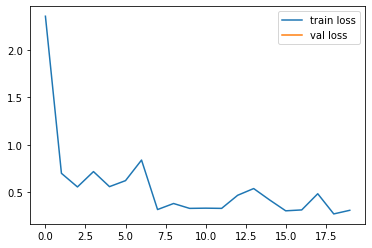

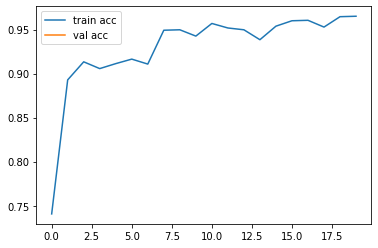

<Figure size 432x288 with 0 Axes>

In [126]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [127]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [128]:

y_pred = model.predict(test_set)


In [129]:
y_pred

array([[9.99769747e-01, 2.30273872e-04, 1.72803149e-25, 4.59254088e-19],
       [5.64398853e-37, 1.41681805e-11, 3.32207302e-36, 1.00000000e+00],
       [8.75829507e-24, 8.90864585e-13, 1.00000000e+00, 1.49458050e-12],
       [5.49319480e-38, 1.00000000e+00, 2.40076958e-23, 1.02614857e-18],
       [1.38263740e-24, 2.09747450e-04, 1.99920652e-20, 9.99790251e-01],
       [0.00000000e+00, 1.00000000e+00, 1.16269491e-32, 4.80047620e-28],
       [1.27955296e-12, 9.76004124e-01, 2.21886607e-16, 2.39958595e-02],
       [2.62895061e-27, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.15968693e-22, 1.43495981e-07, 3.58846628e-05, 9.99963999e-01],
       [2.96306491e-14, 5.33355937e-15, 1.00000000e+00, 1.83363310e-17],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.81846487e-29],
       [5.13731212e-26, 1.00000000e+00, 1.09541729e-18, 1.92916451e-12],
       [1.00000000e+00, 5.87041226e-36, 8.31341191e

In [130]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [131]:
y_pred

array([0, 3, 2, 1, 3, 1, 1, 2, 1, 3, 2, 1, 1, 0, 3, 2, 2, 0])

In [137]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [138]:
model=load_model('model_inception.h5')

In [142]:
img=image.load_img('/content/drive/My Drive/Datasets/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))



In [145]:
x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [146]:
x.shape

(224, 224, 3)

In [147]:
x=x/255

In [148]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [149]:
model.predict(img_data)

array([[0.40639442, 0.5848447 , 0.00563833, 0.00312256]], dtype=float32)

In [150]:
a=np.argmax(model.predict(img_data), axis=1)

In [151]:
a==1

array([ True])